In [1]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.utils import check_random_state
from sklearn.metrics import adjusted_rand_score,silhouette_samples,silhouette_score
from sklearn.utils import resample
from tabulate import tabulate
from sklearn.mixture import GaussianMixture
import numpy as np
import matplotlib.pyplot as plt
import os 

os.environ["OMP_NUM_THREADS"] = "3"

In [3]:
data = pd.read_csv("mcdonalds.csv")
list(data.columns)

['yummy',
 'convenient',
 'spicy',
 'fattening',
 'greasy',
 'fast',
 'cheap',
 'tasty',
 'expensive',
 'healthy',
 'disgusting',
 'Like',
 'Age',
 'VisitFrequency',
 'Gender']

In [5]:
data.head(3)


,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female


In [7]:
MD = data.iloc[:, 0:11].replace({"Yes":1,"No":0})
round(MD.mean(),2)

C:\Users\shaha\AppData\Local\Temp\ipykernel_5644\1024177934.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  MD = data.iloc[:, 0:11].replace({"Yes":1,"No":0})


yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64

In [9]:
pca = PCA()
pca.fit(MD)
summary_df = pd.DataFrame({
    "Standard Deviation: ": np.round(pca.singular_values_,2),
    "Proportion of Variance: ": np.round(pca.explained_variance_ratio_,2),
    "Cumulative Proportion: ": np.round(pca.explained_variance_ratio_.cumsum(),2),
}, index=[f'PC{i+1}' for i in range(len(pca.singular_values_))])
print(tabulate(summary_df, headers='keys',tablefmt='pretty'))

+------+----------------------+--------------------------+-------------------------+
|      | Standard Deviation:  | Proportion of Variance:  | Cumulative Proportion:  |
+------+----------------------+--------------------------+-------------------------+
| PC1  |        28.85         |           0.3            |           0.3           |
| PC2  |        23.15         |           0.19           |          0.49           |
| PC3  |        19.23         |           0.13           |          0.63           |
| PC4  |         15.2         |           0.08           |          0.71           |
| PC5  |        12.86         |           0.06           |          0.77           |
| PC6  |        11.82         |           0.05           |          0.82           |
| PC7  |        11.04         |           0.04           |          0.86           |
| PC8  |        10.48         |           0.04           |           0.9           |
| PC9  |        10.11         |           0.04           |       

In [11]:
rotation_matrix = pd.DataFrame(
    np.round(pca.components_,1),
    columns=MD.columns,
    index=[f'PC{i+1}' for i in range(len(pca.components_))]
)

standard_deviations = np.round(pca.singular_values_,1)
print(rotation_matrix)
print("\nstandard deviations:")
print(standard_deviations)

      yummy  convenient  spicy  fattening  greasy  fast  cheap  tasty  \
PC1    -0.5        -0.2   -0.0        0.1     0.3  -0.1   -0.3   -0.5   
PC2     0.4         0.0    0.0       -0.0    -0.1  -0.1   -0.6    0.3   
PC3    -0.3        -0.1   -0.0       -0.3    -0.8  -0.1   -0.1   -0.3   
PC4     0.1        -0.1    0.2       -0.4     0.3  -0.1    0.1   -0.0   
PC5    -0.3         0.3    0.1       -0.1     0.4   0.1   -0.1   -0.2   
PC6     0.2        -0.3   -0.4       -0.4     0.2  -0.6   -0.1   -0.1   
PC7    -0.3        -0.1    0.7       -0.4     0.0  -0.1   -0.0    0.4   
PC8     0.0        -0.1    0.4        0.6    -0.1  -0.6    0.1   -0.1   
PC9     0.6        -0.0    0.4       -0.2    -0.0   0.2    0.1   -0.6   
PC10   -0.1        -0.7   -0.1       -0.0     0.0   0.2    0.4    0.1   
PC11    0.0        -0.5    0.1        0.3     0.0   0.3   -0.5    0.0   

      expensive  healthy  disgusting  
PC1         0.3     -0.2         0.4  
PC2         0.6      0.1        -0.1  
PC3   

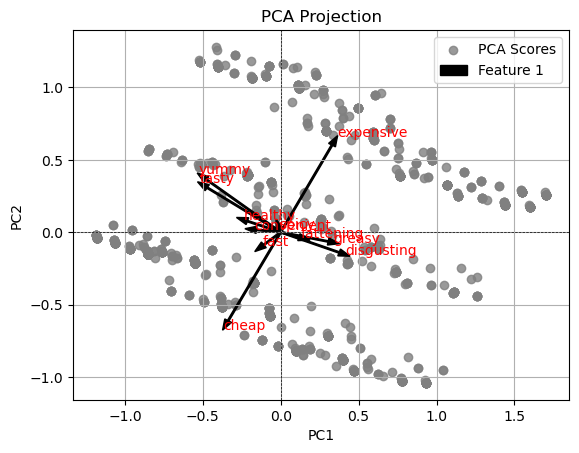

In [13]:
pca = PCA()
pca_s = pca.fit_transform(MD)
plt.scatter(pca_s[:,0],pca_s[:,1],color='grey',alpha=0.8,label='PCA Scores')

for i, vector in enumerate(pca.components_.T):
    plt.arrow(0,0, vector[0], vector[1],
              color='black',width=0.01,head_width=0.05,label=f"Feature {i+1}" if i==0 else "")
    plt.text(vector[0] * 1.1, vector[1] * 1.1, MD.columns[i],color='red')

plt.axhline(0,color='black',linewidth=0.5,linestyle='--')
plt.axvline(0,color='black',linewidth=0.5,linestyle='--')
plt.title("PCA Projection")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.grid() 
plt.show()


In [ ]:
random_state = check_random_state(2532)

models = {
    k : KMeans(n_clusters=k,n_init=10,random_state=random_state).fit(MD)
    for k in range(2,9)
}
MD_km28 = models

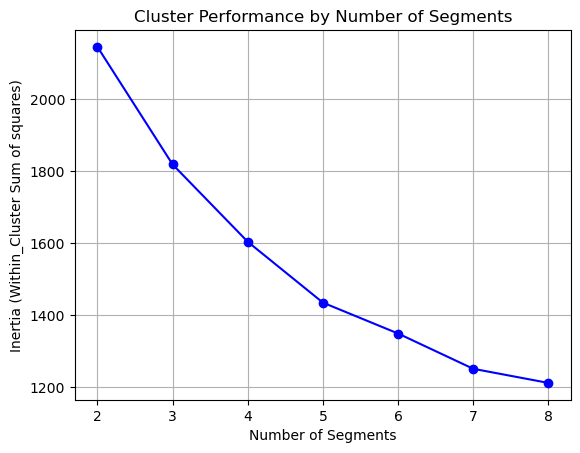

In [19]:
cluster_range = list(MD_km28.keys())
inertia_values = [model.inertia_ for model in MD_km28.values()]

plt.plot(cluster_range,inertia_values,marker='o',linestyle='-',color='blue')
plt.xlabel("Number of Segments")
plt.ylabel("Inertia (Within_Cluster Sum of squares)")
plt.title("Cluster Performance by Number of Segments")
plt.grid()
plt.show()

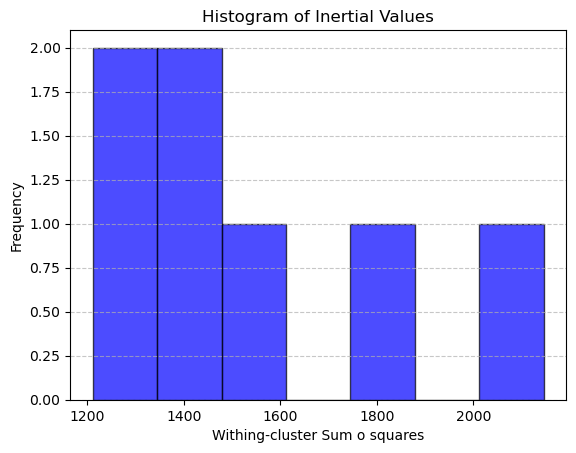

In [21]:
inertia_values = [model.inertia_ for model in MD_km28.values()]

plt.hist(inertia_values,bins=len(MD_km28),color="blue",edgecolor="black",alpha=0.7)
plt.xlabel("Withing-cluster Sum o squares")
plt.ylabel("Frequency")
plt.title("Histogram of Inertial Values")
plt.grid(axis='y',linestyle='--',alpha=0.7)
plt.show()

In [ ]:
np.random.seed(2532)
cluster_range = range(2,9)
nboot = 20 
stability_scores = []

for k in cluster_range:
    scores = []
    for i in range(100):
        boot_data = resample(MD, n_samples=len(MD)//2)
        ref_model = KMeans(n_clusters=k, n_init=5 ,random_state=2532).fit(boot_data)
        test_model = KMeans(n_clusters=k,n_init=5,random_state=5673).fit(boot_data)
        scores.append(adjusted_rand_score(ref_model.labels_, test_model.labels_))
    stability_scores.append(scores)

plt.boxplot(stability_scores,labels=cluster_range,patch_artist=True)
plt.xlabel("Number of Segments")
plt.ylabel("Adjusted Rand Index")
plt.title("Global Stability Boxplot")
plt.grid(axis='y',linestyle='--',alpha=0.7)
plt.show()

C:\Users\shaha\anaconda3\envs\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


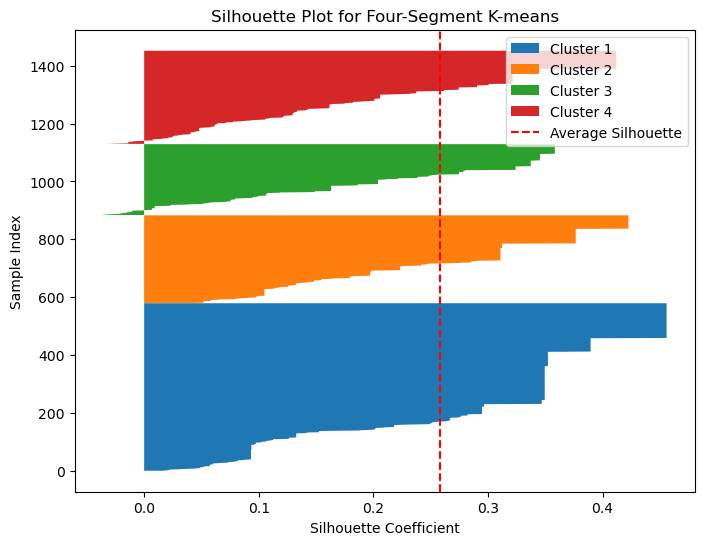

In [28]:
kmeans = KMeans(n_clusters=4,random_state=2532).fit(MD)

silhouette_vals = silhouette_samples(MD, kmeans.labels_)
avg_silhouette = silhouette_score(MD, kmeans.labels_)


plt.figure(figsize=(8, 6))
y_lower = 0
for i in range(4):  
    cluster_vals = silhouette_vals[kmeans.labels_ == i]
    cluster_vals.sort()
    y_upper = y_lower + len(cluster_vals)
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_vals, label=f'Cluster {i+1}')
    y_lower = y_upper

plt.axvline(avg_silhouette, color="red", linestyle="--", label="Average Silhouette")
plt.xlabel("Silhouette Coefficient")
plt.ylabel("Sample Index")
plt.legend()
plt.title("Silhouette Plot for Four-Segment K-means")
plt.show()


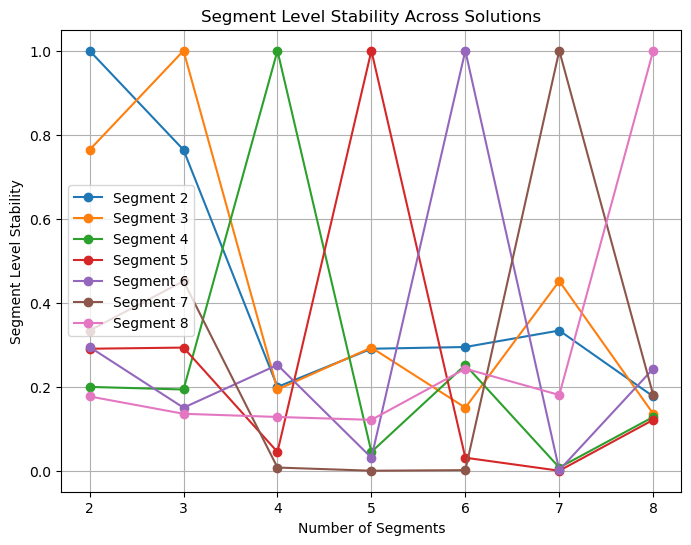

In [29]:
num_segments = range(2, 9)
segment_stability = []

for segment in num_segments:
    if segment in MD_km28:
        labels_segment = MD_km28[segment].predict(MD)
        segment_stability.append(labels_segment)
    else:
        print(f"Key {segment} not found in MD_km28.")


stability_scores = []
for i in range(len(segment_stability)):
    stability_scores.append([np.mean(segment_stability[i] == other) for other in segment_stability])

# Plot Segment Level Stability (SLSA) Plot
plt.figure(figsize=(8, 6))
for i, segment in enumerate(num_segments):
    plt.plot(num_segments, stability_scores[i], marker='o', label=f'Segment {segment}')

plt.xlabel('Number of Segments')
plt.ylabel('Segment Level Stability')
plt.title('Segment Level Stability Across Solutions')
plt.xticks(num_segments)
plt.legend()
plt.grid(True)

plt.show()

C:\Users\shaha\anaconda3\envs\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\shaha\anaconda3\envs\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\shaha\anaconda3\envs\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\shaha\anaconda3\envs\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a m

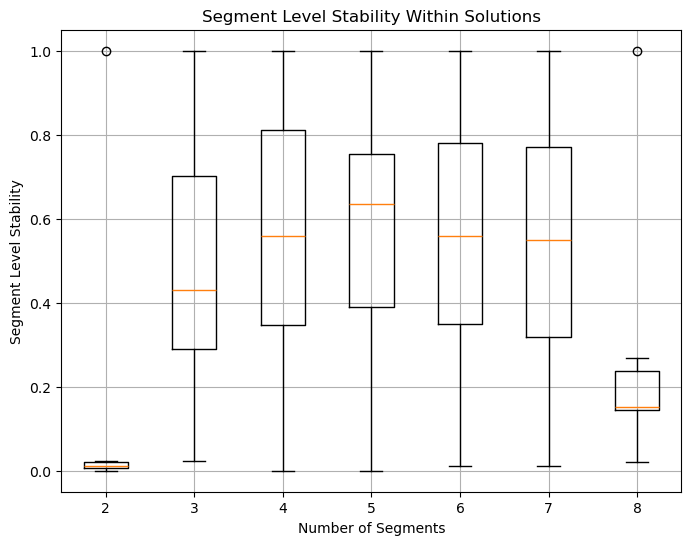

In [30]:
num_segments = range(2, 9)
segment_stability = []

for segment in num_segments:
    kmeans = KMeans(n_clusters=segment, random_state=1234).fit(MD)
    labels_segment = kmeans.labels_
    segment_stability.append(labels_segment)

stability_scores = []
for i in range(len(segment_stability)):
    stability_scores.append([np.mean(segment_stability[i] == other) for other in segment_stability])

plt.figure(figsize=(8, 6))
plt.boxplot(stability_scores, labels=num_segments)
plt.xlabel('Number of Segments')
plt.ylabel('Segment Level Stability')
plt.title('Segment Level Stability Within Solutions')
plt.grid(True)
plt.show()

In [31]:
num_segments = range(2, 9) 
results = []

for k in num_segments:
    gmm = GaussianMixture(n_components=k, random_state=1234, max_iter=100, n_init=10)
    gmm.fit(MD)  
   
    log_likelihood = gmm.score(MD) * len(MD)  
    aic = gmm.aic(MD)
    bic = gmm.bic(MD)
    icl = bic - 2 * log_likelihood

    results.append({
        "Segment Number (k)": k,
        "Iterations": gmm.n_iter_,
        "Converged": gmm.converged_,
        "Log-Likelihood": log_likelihood,
        "AIC": aic,
        "BIC": bic,
        "ICL": icl
    })

df_results = pd.DataFrame(results)
print(df_results)

C:\Users\shaha\anaconda3\envs\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\shaha\anaconda3\envs\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\shaha\anaconda3\envs\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\shaha\anaconda3\envs\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a m

   Segment Number (k)  Iterations  Converged  Log-Likelihood           AIC  \
0                   2           7       True    11147.820925 -21985.641850   
1                   3          12       True    14126.449712 -27786.899425   
2                   4          11       True    17513.541902 -34405.083804   
3                   5          18       True    22500.931691 -44223.863382   
4                   6           8       True    28522.042011 -56110.084021   
5                   7          18       True    29652.476457 -58214.952914   
6                   8          12       True    26714.810184 -52183.620368   

            BIC            ICL  
0 -21167.027072  -43462.668921  
1 -26556.336565  -54809.235990  
2 -32762.572863  -67789.656668  
3 -42169.404358  -87171.267740  
4 -53643.676917 -110687.760938  
5 -55336.597727 -114641.550641  
6 -48893.317099 -102322.937467  


C:\Users\shaha\anaconda3\envs\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


C:\Users\shaha\anaconda3\envs\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\shaha\anaconda3\envs\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\shaha\anaconda3\envs\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\shaha\anaconda3\envs\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a m

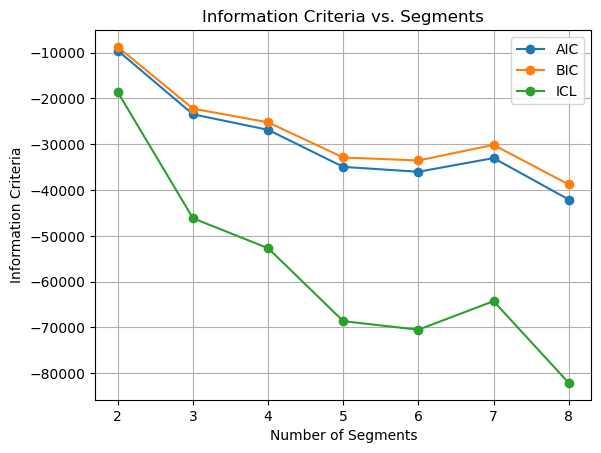

In [32]:
from sklearn.mixture import GaussianMixture

num_segments = range(2, 9)
aic, bic, icl = [], [], []

for k in num_segments:
    gmm = GaussianMixture(n_components=k, random_state=1234).fit(MD)
    log_likelihood = gmm.score(MD) * len(MD)
    aic.append(gmm.aic(MD))
    bic.append(gmm.bic(MD))
    icl.append(gmm.bic(MD) - 2 * log_likelihood)

plt.plot(num_segments, aic, label='AIC', marker='o')
plt.plot(num_segments, bic, label='BIC', marker='o')
plt.plot(num_segments, icl, label='ICL', marker='o')
plt.xlabel('Number of Segments')
plt.ylabel('Information Criteria')
plt.title('Information Criteria vs. Segments')
plt.legend()
plt.grid(True)
plt.show()

In [33]:
kmeans = KMeans(n_clusters=4, random_state=1234).fit(MD)
gmm = GaussianMixture(n_components=4, random_state=1234).fit(MD)

kmeans_labels = kmeans.labels_
gmm_labels = gmm.predict(MD)

comparison_table = pd.crosstab(kmeans_labels, gmm_labels, rownames=['KMeans Cluster'], colnames=['GMM Cluster'])

print(comparison_table)

GMM Cluster       0    1    2    3
KMeans Cluster                    
0               546    0    1   33
1                 0  213   11    4
2                46    3  265    8
3                29   38    0  256


C:\Users\shaha\anaconda3\envs\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\shaha\anaconda3\envs\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


In [34]:
log_likelihood_gmm = gmm.score(MD) * len(MD)  
log_likelihood_kmeans = kmeans.score(MD) 

print(f"Log Likelihood for GMM (MD.m4a): {log_likelihood_gmm:.3f} (df=47)")
print(f"Log Likelihood for KMeans (MD.m4): {log_likelihood_kmeans:.3f} (df=47)")

Log Likelihood for GMM (MD.m4a): 13740.704 (df=47)
Log Likelihood for KMeans (MD.m4): -1603.914 (df=47)


In [35]:
like_counts = data['Like'].value_counts()
reversed_counts = like_counts.sort_index(ascending=False)

print(reversed_counts)


Like
I love it!+5    143
I hate it!-5    152
0               169
-4               71
-3               73
-2               59
-1               58
+4              160
+3              229
+2              187
+1              152
Name: count, dtype: int64


In [36]:
data['Like.n'] = 6 - pd.to_numeric(data['Like'], errors='coerce')

like_n_counts = data['Like.n'].value_counts()

print(like_n_counts)

Like.n
3.0     229
4.0     187
6.0     169
2.0     160
5.0     152
9.0      73
10.0     71
8.0      59
7.0      58
Name: count, dtype: int64


In [37]:
target = 'Like.n'
features = data.columns.difference([target])  

data_encoded = pd.get_dummies(data[features])

X = data_encoded
y = data[target]

gmm = GaussianMixture(n_components=2, random_state=1234)
gmm.fit(X)

y_pred = gmm.predict(X)

print(f'Converged: {gmm.converged_}')
print(f'Log Likelihood: {gmm.score(X)}')
print(f'Cluster Labels: {y_pred}')

Converged: True
Log Likelihood: 88.9210589381115
Cluster Labels: [1 0 0 ... 0 0 1]


C:\Users\shaha\anaconda3\envs\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


In [38]:
from sklearn.preprocessing import LabelEncoder

target = 'Like.n'
features = data.columns.difference([target]) 

label_encoder = LabelEncoder()

for col in data[features].select_dtypes(include=['object']).columns:
    data[col] = label_encoder.fit_transform(data[col])

X = data[features]
y = data[target]

gmm = GaussianMixture(n_components=2, random_state=1234)
gmm.fit(X)

y_pred = gmm.predict(X)

print(f'Converged: {gmm.converged_}')
print(f'Log Likelihood: {gmm.score(X)}')
print(f'Cluster Labels: {y_pred}')

C:\Users\shaha\anaconda3\envs\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


Converged: True
Log Likelihood: -0.7990708114510935
Cluster Labels: [0 0 1 ... 0 1 0]


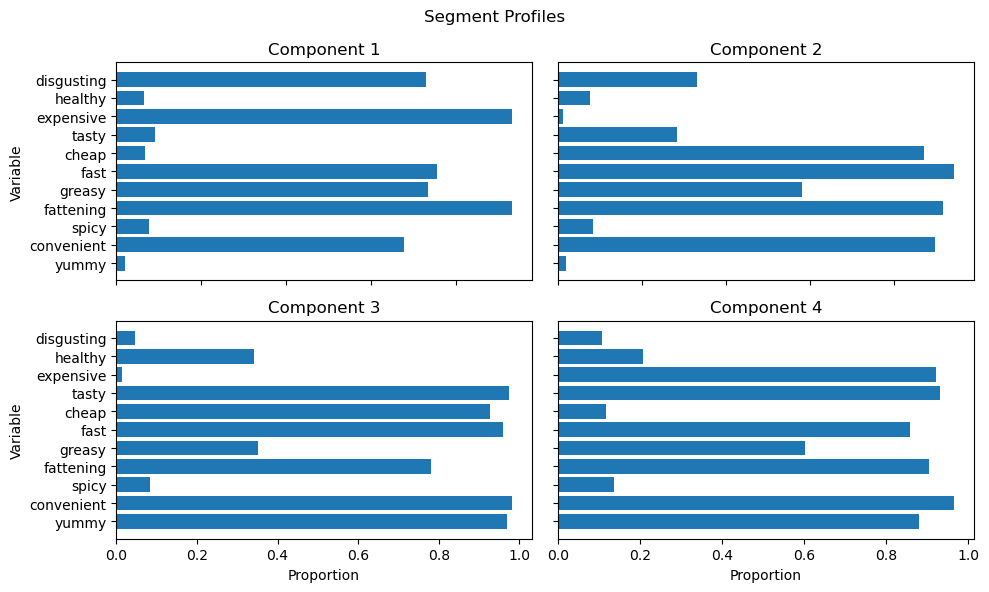

In [39]:
kmeans = MD_km28[4]  
labels = kmeans.labels_  
MD_mean = MD.groupby(labels).mean()

fig, axs = plt.subplots(2, 2, figsize=(10, 6))

for i in range(4):  
    axs[i//2, i%2].barh(range(MD_mean.shape[1]), MD_mean.iloc[i])
    axs[i//2, i%2].set_title(f'Component {i + 1}')  
    axs[i//2, i%2].set(ylabel='Variable', xlabel='Proportion')  

for ax in axs.flat:
    ax.set_yticks(range(MD_mean.shape[1]))
    ax.set_yticklabels(MD.columns) 


for ax in axs.flat:
    ax.label_outer()

fig.suptitle('Segment Profiles')
fig.tight_layout()

plt.show()

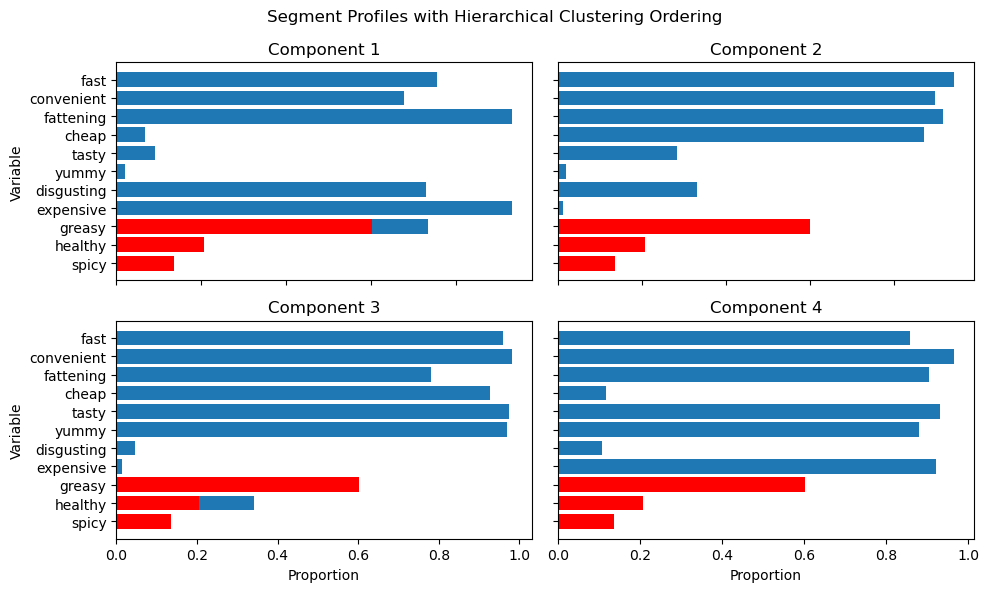

In [40]:
from scipy.cluster.hierarchy import linkage, dendrogram

Z = linkage(MD.T, method='ward') 

order = dendrogram(Z, no_plot=True)['leaves']

MD_mean = MD.groupby(kmeans.labels_).mean() 

MD_mean_reordered = MD_mean.iloc[:, order]

fig, axs = plt.subplots(2, 2, figsize=(10, 6))

for i in range(4): 
    axs[i//2, i%2].barh(range(MD_mean_reordered.shape[1]), MD_mean_reordered.iloc[i])
    axs[i//2, i%2].set_title(f'Component {i + 1}')
    axs[i//2, i%2].set(ylabel='Variable', xlabel='Proportion')


highlighted_vars = [0, 1, 2] 
for ax in axs.flat:
    for idx in highlighted_vars:
        ax.barh(idx, MD_mean_reordered.iloc[i, idx], color='red')

for ax in axs.flat:
    ax.set_yticks(range(MD_mean_reordered.shape[1]))
    ax.set_yticklabels(MD.columns[order]) 

for ax in axs.flat:
    ax.label_outer()

fig.suptitle('Segment Profiles with Hierarchical Clustering Ordering')
fig.tight_layout()

plt.show()

In [41]:
from sklearn.preprocessing import StandardScaler

MD_scaled = scaler.fit_transform(MD)


pca = PCA(n_components=2)
MD_pca = pca.fit_transform(MD_scaled)

kmeans = KMeans(n_clusters=4, random_state=1234) 
kmeans.fit(MD_scaled)
labels = kmeans.labels_

plt.figure(figsize=(10, 6))
scatter = plt.scatter(MD_pca[:, 0], MD_pca[:, 1], c=labels, cmap='viridis', marker='o')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.title('Segment Separation Plot')
plt.colorbar(scatter, label='Segment')


plt.quiver(0, 0, pca.components_[0, 0], pca.components_[0, 1], angles='xy', scale_units='xy', scale=1, color='r', label='PC1')
plt.quiver(0, 0, pca.components_[1, 0], pca.components_[1, 1], angles='xy', scale_units='xy', scale=1, color='b', label='PC2')

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

NameError: name 'scaler' is not defined

In [ ]:
from statsmodels.graphics.mosaicplot import mosaic

mcdonalds = pd.DataFrame({
    'Like': np.random.choice(['Love', 'Hate'], size=100)  
})

mcdonalds['Like_encoded'] = mcdonalds['Like'].map({'Love': 1, 'Hate': 0})

kmeans = KMeans(n_clusters=4, random_state=1234)
kmeans.fit(mcdonalds[['Like_encoded']])  
k4 = kmeans.labels_

crosstab = pd.crosstab(k4, mcdonalds['Like'])

mosaic_data = crosstab.to_dict()

plt.figure(figsize=(10, 6))
mosaic(mosaic_data)

plt.xlabel("Segment Number")
plt.ylabel("Like/Hate")

plt.tight_layout()
plt.show()

In [ ]:
kmeans_labels = np.random.randint(0, 4, size=1453)  

MD_km28 = {
    4: type("Mock", (), {"labels_": kmeans_labels})() 
}
MD_k4 = MD_km28[4]  
k4 = MD_k4.labels_ 

if len(k4) != len(data):
    raise ValueError(f"Mismatch between segment labels (length={len(k4)}) and data rows (length={len(data)})")


df = pd.DataFrame({'Segment': k4, 'Age': data['Age']})

df['Segment'] = pd.Categorical(df['Segment'])

df.boxplot(by='Segment', column='Age', grid=False)

plt.title('Parallel box-and-whisker plot of age by segment')
plt.suptitle('')
plt.xlabel('Segment')
plt.ylabel('Age')

plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

mcdonalds = pd.DataFrame({
    'Like': np.random.choice(['Love', 'Hate'], size=100),
    'Age': np.random.randint(18, 70, size=100),
    'VisitFrequency': np.random.choice(['Rarely', 'Sometimes', 'Often'], size=100),
    'Gender': np.random.choice(['Male', 'Female'], size=100),
})

mcdonalds['Like_encoded'] = mcdonalds['Like'].map({'Love': 1, 'Hate': 0})
mcdonalds['VisitFrequency_encoded'] = mcdonalds['VisitFrequency'].map({'Rarely': 0, 'Sometimes': 1, 'Often': 2})
mcdonalds['Gender_encoded'] = mcdonalds['Gender'].map({'Male': 0, 'Female': 1})


target = (mcdonalds['Like_encoded'] == 1).astype(int) 
features = ['Like_encoded', 'Age', 'VisitFrequency_encoded', 'Gender_encoded']

print(target.value_counts())

tree = DecisionTreeClassifier(random_state=1234, max_depth=3) 
tree.fit(mcdonalds[features], target)

plt.figure(figsize=(10, 6))
plot_tree(tree, feature_names=features, class_names=['Not Segment 3', 'Segment 3'], filled=True, rounded=True)
plt.title("Decision Tree for Segment 3")
plt.show()

In [ ]:
mcdonalds = pd.DataFrame({
    'VisitFrequency': np.random.choice(['Rarely', 'Sometimes', 'Often'], size=100),
    'k4': np.random.choice([1,2, 3, 4], size=100), 
})

mcdonalds['VisitFrequency_encoded'] = mcdonalds['VisitFrequency'].map({'Rarely': 0, 'Sometimes': 1, 'Often': 2})

visit = mcdonalds.groupby('k4')['VisitFrequency_encoded'].mean()

print(visit)

In [ ]:
mcdonalds = pd.DataFrame({
    'Like.n': np.random.randint(1, 6, size=100), 
    'k4': np.random.choice([1,2, 3, 4], size=100),
})

like = mcdonalds.groupby('k4')['Like.n'].mean()

print(like)

In [ ]:
mcdonalds = pd.DataFrame({
    'Gender': np.random.choice(['Male', 'Female'], size=100),
    'k4': np.random.choice([1,2, 3, 4], size=100)  
})

mcdonalds['is_female'] = (mcdonalds['Gender'] == 'Female').astype(int)

female = mcdonalds.groupby('k4')['is_female'].mean()

print(female)

In [ ]:
visit = np.array([3.2, 3.8, 2.5, 4.1])  
like = np.array([1.5, -0.5, 2.0, -2.5]) 
female = np.array([0.2, 0.5, 0.7, 0.3])  
segments = range(1, 5) 

plt.figure(figsize=(8, 6))
plt.scatter(visit, like, s=1000 * female, alpha=0.6, edgecolors="k", c="lightblue")

for i, (x, y) in enumerate(zip(visit, like), start=1):
    plt.text(x, y, str(i), fontsize=12, ha='center', va='center')

plt.xlim(2, 4.5)
plt.ylim(-3, 3)

plt.xlabel("Visit")
plt.ylabel("Like")

plt.title("Segment Profile Plot")

plt.grid(True, linestyle='--', alpha=0.7)

plt.show()